In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kstest, ttest_ind, shapiro, norm, f_oneway, levene

In [ ]:
works = pd.read_csv('works_ver3.csv', encoding='1251', sep=';', decimal=',')
works.head()

,season,field,work_type,work_subtype,start_date,end_date,area,main_tech,add_tech,mech,proc_depth,prod_purpose,prod_weight,Unnamed: 13,Unnamed: 14,prod_dry_perc,prod_humid,prod_impur,yield_fact,work_id
0,2023,16.13.12.044.00,Обработка почвы,Боронование,29.04.2022,30.04.2022,"49,78","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Ахметсафин Айрат Рафикович,10.0,NaN,0.0,ИСТИНА,"0,00",NaN,NaN,NaN,0.0,A06AD38A-5448-40EC-B095-4B8918B4AC10
1,2023,16.13.12.017.00,Обработка почвы,Боронование,01.05.2022,02.05.2022,"154,76","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Ямалетдинов Фарид Расыхович,10.0,NaN,0.0,ИСТИНА,"0,00",NaN,NaN,NaN,0.0,62B13DCE-FFB5-4E7A-8F1B-88930BD338EF
2,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"40,62","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Мухаметзянов Ринат Айратович,10.0,NaN,0.0,ИСТИНА,"0,00",NaN,NaN,NaN,0.0,D5884A6D-4710-4C0A-8E5A-878291B89846
3,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"86,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,10.0,NaN,0.0,ИСТИНА,"0,00",NaN,NaN,NaN,0.0,7A504837-1127-4315-ACF1-171AC80111BF
4,2023,16.13.12.017.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"76,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,10.0,NaN,0.0,ИСТИНА,"0,00",NaN,NaN,NaN,0.0,7FE86DA8-614B-4EBE-85CB-6AF80C08689F


В area есть не цифровые значения, тк оно не поменялось на float

In [ ]:
print(set([type(i) for i in works.area]))
works['area'] = works['area'].apply(lambda x:float(x.replace(',', '.')))
print(set([type(i) for i in works.area]))
works.head()

{<class 'str'>}
{<class 'float'>}


,season,field,work_type,work_subtype,start_date,end_date,area,main_tech,add_tech,mech,proc_depth,prod_purpose,prod_weight,Unnamed: 13,Unnamed: 14,prod_dry_perc,prod_humid,prod_impur,yield_fact,work_id
0,2023,16.13.12.044.00,Обработка почвы,Боронование,29.04.2022,30.04.2022,49.78,"Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Ахметсафин Айрат Рафикович,10.0,NaN,0.0,ИСТИНА,"0,00",NaN,NaN,NaN,0.0,A06AD38A-5448-40EC-B095-4B8918B4AC10
1,2023,16.13.12.017.00,Обработка почвы,Боронование,01.05.2022,02.05.2022,154.76,"Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Ямалетдинов Фарид Расыхович,10.0,NaN,0.0,ИСТИНА,"0,00",NaN,NaN,NaN,0.0,62B13DCE-FFB5-4E7A-8F1B-88930BD338EF
2,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,40.62,"Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Мухаметзянов Ринат Айратович,10.0,NaN,0.0,ИСТИНА,"0,00",NaN,NaN,NaN,0.0,D5884A6D-4710-4C0A-8E5A-878291B89846
3,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,86.00,"Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,10.0,NaN,0.0,ИСТИНА,"0,00",NaN,NaN,NaN,0.0,7A504837-1127-4315-ACF1-171AC80111BF
4,2023,16.13.12.017.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,76.00,"Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,10.0,NaN,0.0,ИСТИНА,"0,00",NaN,NaN,NaN,0.0,7FE86DA8-614B-4EBE-85CB-6AF80C08689F


In [ ]:
works.dtypes

season             int64
field             object
work_type         object
work_subtype      object
start_date        object
end_date          object
area             float64
main_tech         object
add_tech          object
mech              object
proc_depth       float64
prod_purpose      object
prod_weight      float64
Unnamed: 13       object
Unnamed: 14       object
prod_dry_perc    float64
prod_humid       float64
prod_impur       float64
yield_fact       float64
work_id           object
dtype: object

NaN's

In [ ]:
for col in works.columns:
    if works[col].isna().any(axis=0): # если значение количества NaN'ов больше 0, то выводим эти значения
        print(f'{col}: {works[col].isna().sum()}')

end_date: 9004
add_tech: 48540
proc_depth: 132562
prod_purpose: 140822
prod_dry_perc: 161715
prod_humid: 151128
prod_impur: 151128


In [ ]:
#works = works.dropna(subset=['depth', 'prod_purpose', 'prod_dry_perc', 'prod_impur', 'prod_humid'])

Общий дроп этих параметров

In [ ]:
fields = pd.read_csv('fields_ver3.csv', encoding='1251', sep=';', decimal=',')
fields.head()

,field,region,land_type,fertility_score,season,crop,crop_predecessor,crop_yearold,area,hybrid,reproduction,seed_origin,technology,yield_plan,p2o5,k2o,humus,ph
0,22.47.01.001.01,Алтай,пашня,NaN,2023,Оз.пшеница мягкая,Пар; Яр.пшеница мягкая,NaN,306.22,Скипетр,ЭС,Покупные,минимальная,3.8,221.05,206.3,4.05,5.25
1,22.47.01.001.02,Алтай,пашня,NaN,2023,Пар,Пар; Яр.пшеница мягкая,NaN,63.16,NaN,NaN,NaN,минимальная,NaN,221.05,206.3,4.05,5.25
2,22.47.01.002.00,Алтай,пашня,4.0,2023,Пар,Яр.пшеница мягкая,NaN,485.79,NaN,NaN,NaN,NaN,NaN,199.80,186.0,3.50,5.20
3,22.47.01.003.00,Алтай,пашня,4.0,2023,Оз.пшеница мягкая,Пар,NaN,452.25,Скипетр,ЭС,Покупные,минимальная,3.8,186.50,174.8,5.90,5.40
4,22.47.01.004.00,Алтай,пашня,3.0,2023,Оз.пшеница мягкая,Пар,NaN,269.64,Скипетр,ЭС,Покупные,минимальная,3.8,166.60,147.9,5.60,5.40


Гипотеза про зависимость урожая от глубины обработки

In [ ]:
works = works[['season', 'field', 'proc_depth', 'yield_fact']]
for col in works.columns:
    if works[col].isna().any(axis=0): # если значение количества NaN'ов больше 0, то выводим эти значения
        print(f'{col}: {works[col].isna().sum()}')

proc_depth: 132562


Удаляем выбросы

In [ ]:
fields = fields[['humus', 'season', 'field']]
fields.shape

(16060, 3)

In [ ]:
fields['id'] = fields['season'].map(str)+ ' ' +fields['field'].map(str)
works['id'] = works['season'].map(str)+ ' ' +works['field'].map(str)
merged_works = works.merge(fields, on='id', how='left')
merged_works

,season_x,field_x,proc_depth,yield_fact,id,humus,season_y,field_y
0,2023,16.13.12.044.00,10.0,0.00,2023 16.13.12.044.00,6.00,2023.0,16.13.12.044.00
1,2023,16.13.12.017.00,10.0,0.00,2023 16.13.12.017.00,8.00,2023.0,16.13.12.017.00
2,2023,16.13.12.012.00,10.0,0.00,2023 16.13.12.012.00,7.80,2023.0,16.13.12.012.00
3,2023,16.13.12.012.00,10.0,0.00,2023 16.13.12.012.00,7.80,2023.0,16.13.12.012.00
4,2023,16.13.12.017.00,10.0,0.00,2023 16.13.12.017.00,8.00,2023.0,16.13.12.017.00
...,...,...,...,...,...,...,...,...
174678,2024,54.17.12.029.00,NaN,0.00,2024 54.17.12.029.00,7.30,2024.0,54.17.12.029.00
174679,2024,54.28.13.038.00,NaN,1.15,2024 54.28.13.038.00,5.70,2024.0,54.28.13.038.00
174680,2024,54.28.07.028.00,15.0,0.00,2024 54.28.07.028.00,NaN,2024.0,54.28.07.028.00
174681,2024,54.28.07.028.00,15.0,0.00,2024 54.28.07.028.00,NaN,2024.0,54.28.07.028.00


Добавим столбец медианной обработки на каждое поле, объединяем по полю, тк нам интересна общая картина (ну и по +году было бы 6 значений тоже)

In [ ]:
dt = merged_works.groupby('field_x')['proc_depth'].median()
merged_works['depth'] = merged_works['field_x'].apply(lambda x:dt[x])
merged_works.head()

,season_x,field_x,proc_depth,yield_fact,id,humus,season_y,field_y,depth
0,2023,16.13.12.044.00,10.0,0.0,2023 16.13.12.044.00,6.0,2023.0,16.13.12.044.00,10.0
1,2023,16.13.12.017.00,10.0,0.0,2023 16.13.12.017.00,8.0,2023.0,16.13.12.017.00,29.0
2,2023,16.13.12.012.00,10.0,0.0,2023 16.13.12.012.00,7.8,2023.0,16.13.12.012.00,10.0
3,2023,16.13.12.012.00,10.0,0.0,2023 16.13.12.012.00,7.8,2023.0,16.13.12.012.00,10.0
4,2023,16.13.12.017.00,10.0,0.0,2023 16.13.12.017.00,8.0,2023.0,16.13.12.017.00,29.0


In [ ]:
merged_works__ = merged_works[merged_works['yield_fact'] > 0]
merged_works__ = merged_works__.dropna(subset=['depth', 'yield_fact'])
merged_works__.head(20)

,season_x,field_x,proc_depth,yield_fact,id,humus,season_y,field_y,depth
5345,2023,36.02.11.023.00,1.0,7.30,2023 36.02.11.023.00,6.2,2023.0,36.02.11.023.00,4.0
5650,2023,36.02.11.038.00,1.0,7.30,2023 36.02.11.038.00,5.3,2023.0,36.02.11.038.00,7.5
5831,2023,36.02.11.037.00,1.0,7.30,2023 36.02.11.037.00,6.2,2023.0,36.02.11.037.00,10.0
6015,2023,36.02.11.036.00,1.0,7.30,2023 36.02.11.036.00,6.6,2023.0,36.02.11.036.00,4.0
6176,2023,36.02.11.030.00,1.0,7.30,2023 36.02.11.030.00,6.2,2023.0,36.02.11.030.00,4.0
11377,2023,16.13.15.008.00,28.0,1.38,2023 16.13.15.008.00,7.8,2023.0,16.13.15.008.00,10.0
28414,2023,36.02.03.016.00,NaN,1.88,2023 36.02.03.016.00,4.4,2023.0,36.02.03.016.00,5.0
32805,2023,36.02.06.008.01,NaN,2.19,2023 36.02.06.008.01,2.7,2023.0,36.02.06.008.01,5.0
32806,2023,36.02.06.011.00,NaN,2.34,2023 36.02.06.011.00,3.0,2023.0,36.02.06.011.00,5.0
33602,2023,36.02.06.007.00,NaN,2.51,2023 36.02.06.007.00,2.8,2023.0,36.02.06.007.00,6.0


In [ ]:
merged_works___ = merged_works[merged_works['yield_fact'] > 0]
print(merged_works___.shape)
for col in merged_works___.columns:
    if merged_works___[col].isna().any(axis=0): # если значение количества NaN'ов больше 0, то выводим эти значения
        print(f'{col}: {merged_works___[col].isna().sum()}')

(36406, 9)
proc_depth: 36400
humus: 6290
season_y: 283
field_y: 283
depth: 5489


In [ ]:
for col in merged_works.columns:
    if merged_works[col].isna().any(axis=0): # если значение количества NaN'ов больше 0, то выводим эти значения
        print(f'{col}: {merged_works[col].isna().sum()}')

proc_depth: 132562
humus: 41795
season_y: 7661
field_y: 7661
depth: 15810


___________

Посмотрим зависимость гумуса от глубины обработки

In [ ]:
merged_works_hum_proc = merged_works.dropna()

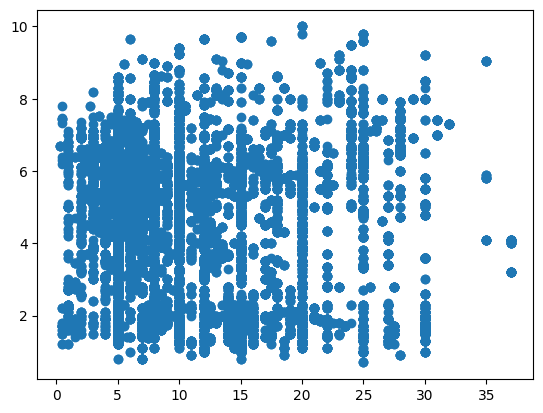

In [ ]:
plt.scatter(x=merged_works_hum_proc['depth'], y=merged_works_hum_proc['humus'])

{'whiskers': [<matplotlib.lines.Line2D at 0x170c0155f60>,
 'caps': [<matplotlib.lines.Line2D at 0x170c01564a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x170c0155cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x170c01569e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x170c0156c80>],
 'means': []}

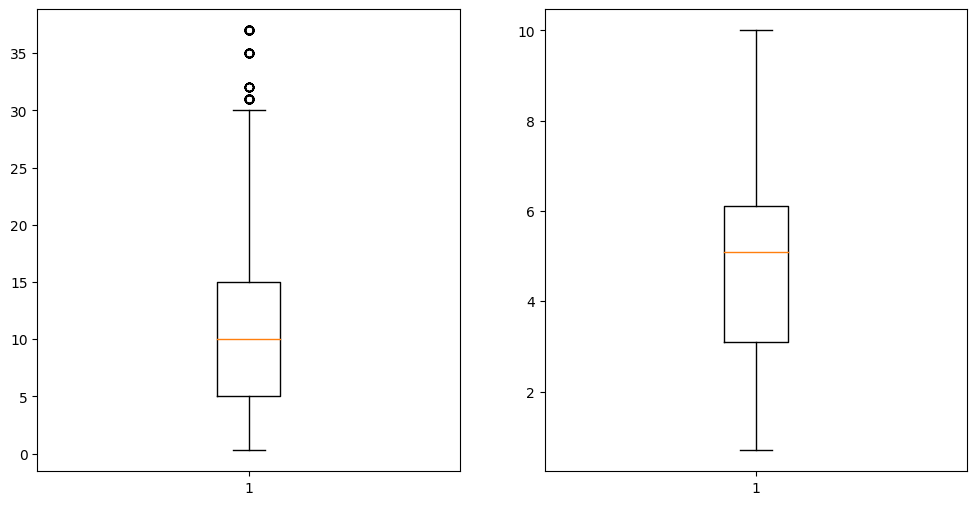

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(merged_works_hum_proc['depth'])
ax[1].boxplot(merged_works_hum_proc['humus'])

Удалим выбросы в глубине обработки

In [ ]:
meann = merged_works_hum_proc['depth'].mean()
iqr = 1.5 * (merged_works_hum_proc['depth'].quantile(0.75) - merged_works_hum_proc['depth'].quantile(0.25))
merged_works_hum_proc = merged_works_hum_proc[(merged_works_hum_proc['depth'] >= meann - iqr) & (merged_works_hum_proc['depth'] <= meann + iqr)]

{'whiskers': [<matplotlib.lines.Line2D at 0x170c5f34670>,
 'caps': [<matplotlib.lines.Line2D at 0x170c5f34bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x170c5f343d0>],
 'medians': [<matplotlib.lines.Line2D at 0x170c5f350f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x170c5f35390>],
 'means': []}

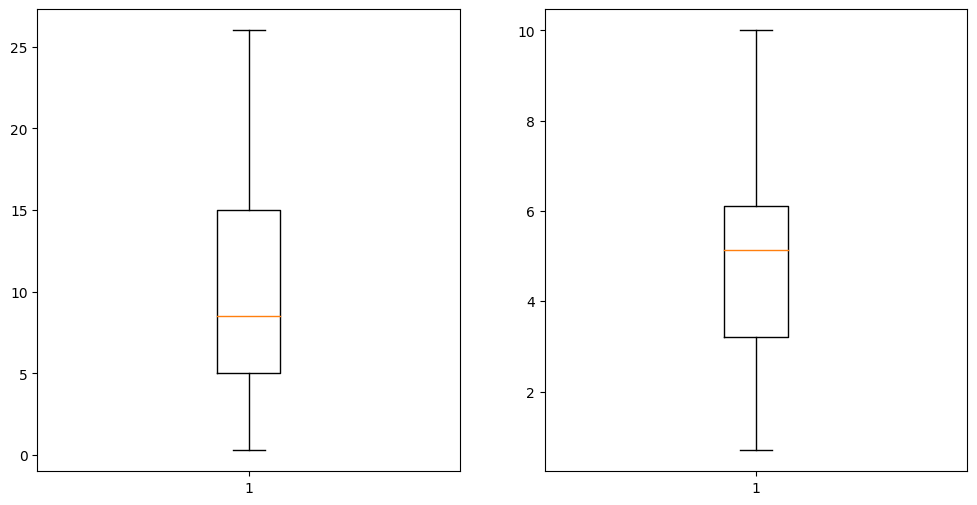

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(merged_works_hum_proc['depth'])
ax[1].boxplot(merged_works_hum_proc['humus'])

<AxesSubplot: xlabel='depth', ylabel='humus'>

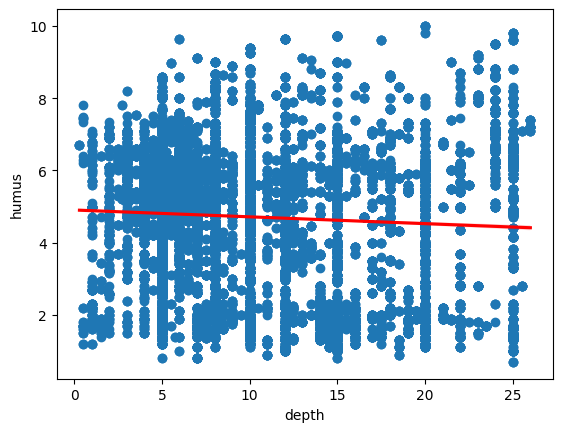

In [ ]:
plt.scatter(x=merged_works_hum_proc['depth'], y=merged_works_hum_proc['humus'])
sns.regplot(x=merged_works_hum_proc['depth'], y=merged_works_hum_proc['humus'], scatter=False, color='red', label='Линия регрессии')

Провертим на нормальность

(array([2117., 3776., 1674., 2782., 5015., 7355., 3662.,  904.,  551.,
         130.]),
 array([ 0.7 ,  1.63,  2.56,  3.49,  4.42,  5.35,  6.28,  7.21,  8.14,
         9.07, 10.  ]),
 <BarContainer object of 10 artists>)

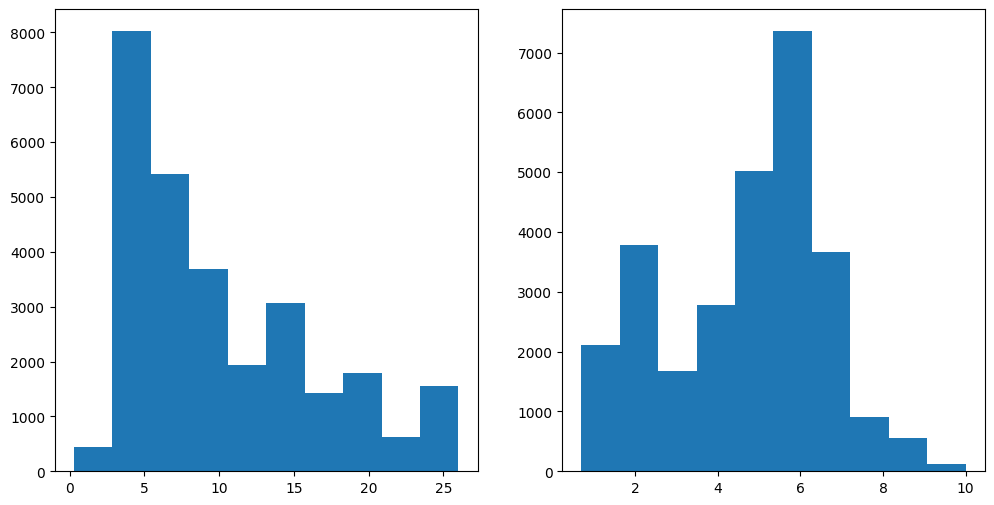

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(merged_works_hum_proc['depth'])
ax[1].hist(merged_works_hum_proc['humus'])

In [ ]:
kstest(merged_works_hum_proc['depth'], 'norm'), kstest(merged_works_hum_proc['humus'], 'norm')

(KstestResult(statistic=0.9825233766590658, pvalue=0.0),
 KstestResult(statistic=0.8930329424253864, pvalue=0.0))

In [ ]:
merged_works.corr(numeric_only=1)

,season_x,proc_depth,yield_fact,humus,season_y,depth
season_x,1.000000,-0.017076,-0.010879,0.053320,1.000000,-0.024086
proc_depth,-0.017076,1.000000,-0.003333,-0.025422,-0.015917,0.112650
yield_fact,-0.010879,-0.003333,1.000000,0.006334,-0.017670,-0.011694
humus,0.053320,-0.025422,0.006334,1.000000,0.053320,-0.057462
season_y,1.000000,-0.015917,-0.017670,0.053320,1.000000,-0.025689
depth,-0.024086,0.112650,-0.011694,-0.057462,-0.025689,1.000000


Нормальное распределение

In [ ]:
merged_works_hum_proc.corr(numeric_only=1)['depth']['humus']

-0.060399367266794575

_______________

Далее сверка гипотезы

In [ ]:
merged_works.yield_fact.value_counts()

yield_fact
0.00       138277
1.18          169
1.27          167
1.30          166
1.06          165
            ...  
12.06           1
1242.28         1
19.77           1
69.58           1
752.68          1
Name: count, Length: 2545, dtype: int64

In [ ]:
merged_works.isna().sum()

season_x           0
field_x            0
proc_depth    132562
yield_fact         0
id                 0
humus          41795
season_y        7661
field_y         7661
depth          15810
dtype: int64

In [ ]:
merged_works[merged_works['yield_fact'] > 0]['yield_fact'].value_counts()

yield_fact
173.64    2
165.12    1
181.80    1
166.33    1
177.70    1
Name: count, dtype: int64

Text(0.5, 1.0, 'Урожайность')

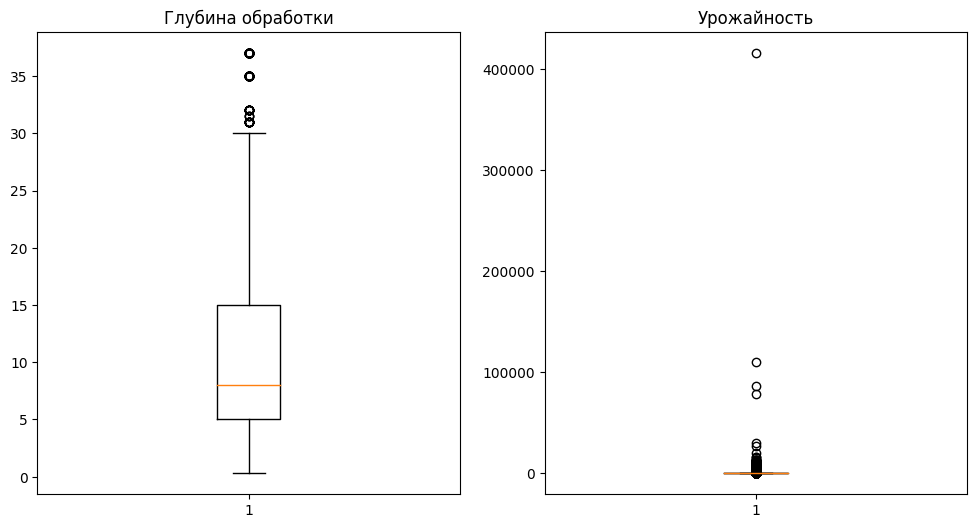

In [ ]:
merged_works = merged_works[merged_works['yield_fact'] > 0]
merged_works = merged_works.dropna(subset=['depth', 'yield_fact'])
dt = merged_works['depth'].dropna()
f, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(dt)
ax[1].boxplot(merged_works['yield_fact'])
ax[0].set_title('Глубина обработки')
ax[1].set_title('Урожайность')

Text(0.5, 1.0, 'Урожайность')

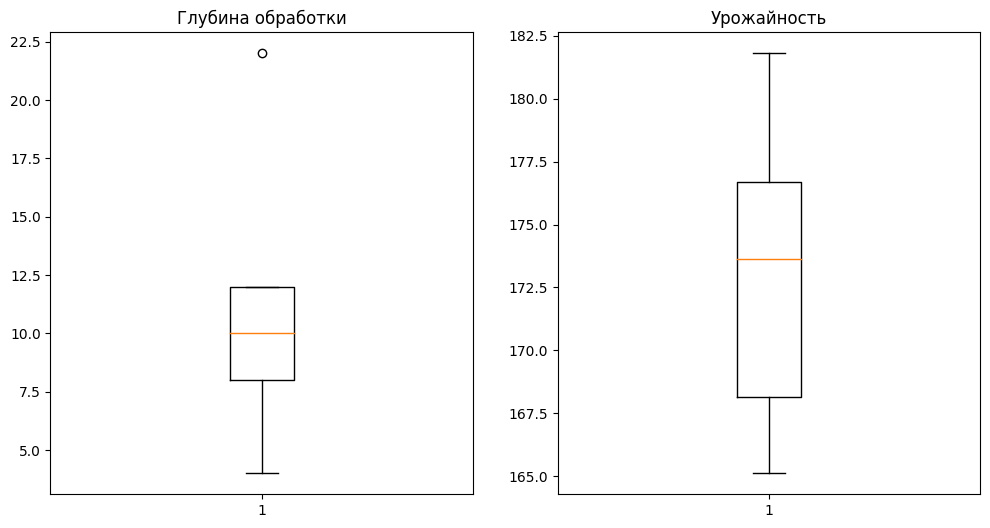

In [ ]:
meann_f = merged_works['yield_fact'].mean()
iqr_f = 3 * (merged_works['yield_fact'].quantile(0.75) - merged_works['yield_fact'].quantile(0.25))
meann_d = merged_works['depth'].mean()
iqr_d = 3 * (merged_works['depth'].quantile(0.75) - merged_works['depth'].quantile(0.25))
merged_works = merged_works[((merged_works['yield_fact'] >= meann_f - iqr_f) & (merged_works['yield_fact'] <= meann_f + iqr_f)) &
                            ((merged_works['depth'] >= meann_d - iqr_d) & (merged_works['depth'] <= meann_d + iqr_d))]
#merged_works = merged_works[(merged_works['yield_fact'] >= merged_works['yield_fact'].quantile(0.01)) & (merged_works['depth'] <= merged_works['depth'].quantile(0.99))]
f, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(merged_works['depth'])
ax[1].boxplot(merged_works['yield_fact'])
ax[0].set_title('Глубина обработки')
ax[1].set_title('Урожайность')

Выбросы в данных удаляем

Разделим по процентилям для сверки гипотезы (по процентилям получаются СЛИШКОМ  разные размеры)

In [ ]:
merged_works = merged_works.sort_values('depth')
merged_works_1 = merged_works.iloc[:merged_works.shape[0] // 5 + 1, :]
merged_works_2 = merged_works.iloc[merged_works.shape[0] // 5 + 1:merged_works.shape[0] // 5 * 2 + 1, :]
merged_works_3 = merged_works.iloc[merged_works.shape[0] // 5 * 2 + 1:merged_works.shape[0] // 5 * 3 + 1, :]
merged_works_4 = merged_works.iloc[merged_works.shape[0] // 5 * 3 + 1:merged_works.shape[0] // 5 * 4 + 1, :]
merged_works_5 = merged_works.iloc[merged_works.shape[0] // 5 * 4 + 1:, :]

Нулевая гипотеза: значения при разных глубинах обработки идентичные

In [ ]:
def check_hypothesis_anova(*args, alpha=0.05):
    f_stat, p_value = f_oneway(*args)

    # Проверка нулевой гипотезы
    if p_value < alpha:
        conclusion = "Отвергаем нулевую гипотезу: Средние значения групп различаются."
    else:
        conclusion = "Не удается отвергнуть нулевую гипотезу: Средние значения групп не различаются."

    return f_stat, p_value, conclusion
f_stat, p_value, conclusion = check_hypothesis_anova(merged_works_1['yield_fact'], merged_works_2['yield_fact'], merged_works_3['yield_fact'], merged_works_4['yield_fact'],
                                                     merged_works_5['yield_fact'])
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
print(conclusion)

F-statistic: 0.1219, p-value: 0.9543
Не удается отвергнуть нулевую гипотезу: Средние значения групп не различаются.


In [ ]:
merged_works_1['yield_fact'].mean()

173.46